In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Références

![visu](../img/visu-plots.png)

- https://www.kaggle.com/vanshjatana/a-simple-tutorial-to-data-visualization
- mini-cours : https://www.kaggle.com/learn/data-visualization
- exemples : https://seaborn.pydata.org/examples/index.html et https://matplotlib.org/3.1.1/gallery/index.html

# Datasets

- scikit-learn
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

- seaborn
On peut les charger avec la commande suivante, la liste des datasets se trouve ici : https://github.com/mwaskom/seaborn-data

```python
sns.load_dataset("dataset_name")
```


# Paramètres généraux

## Widgets

https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [34]:
import ipywidgets as widgets
from IPython.display import display

w = widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

## Couleurs

https://matplotlib.org/3.2.1/gallery/color/color_demo.html

https://matplotlib.org/3.2.1/api/colors_api.html#module-matplotlib.colors

https://seaborn.pydata.org/tutorial/color_palettes.html

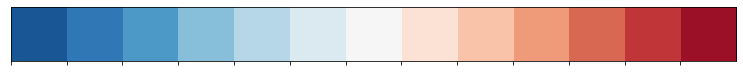

In [35]:
sns.palplot(sns.color_palette("RdBu_r", 13))

## Style

In [36]:
sns.set_style('dark')
sns.set_context('notebook')

#sns.set(context='notebook', style='darkgrid')

In [37]:
plt.rcParams['figure.figsize'] = [12, 8]

## Subplots

In [38]:
deces = pd.read_csv("http://data.cquest.org/insee_deces/insee_deces.csv.gz")

deces['date_naissance']=pd.to_datetime(deces['date_naissance'], errors='coerce', format='%Y-%m-%d')
deces['date_deces']=pd.to_datetime(deces['date_deces'], errors='coerce', format='%Y-%m-%d')

deces=deces.groupby('date_deces')['numero_acte_deces'].count()

/home/lab/anaconda3/envs/ml-learning/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


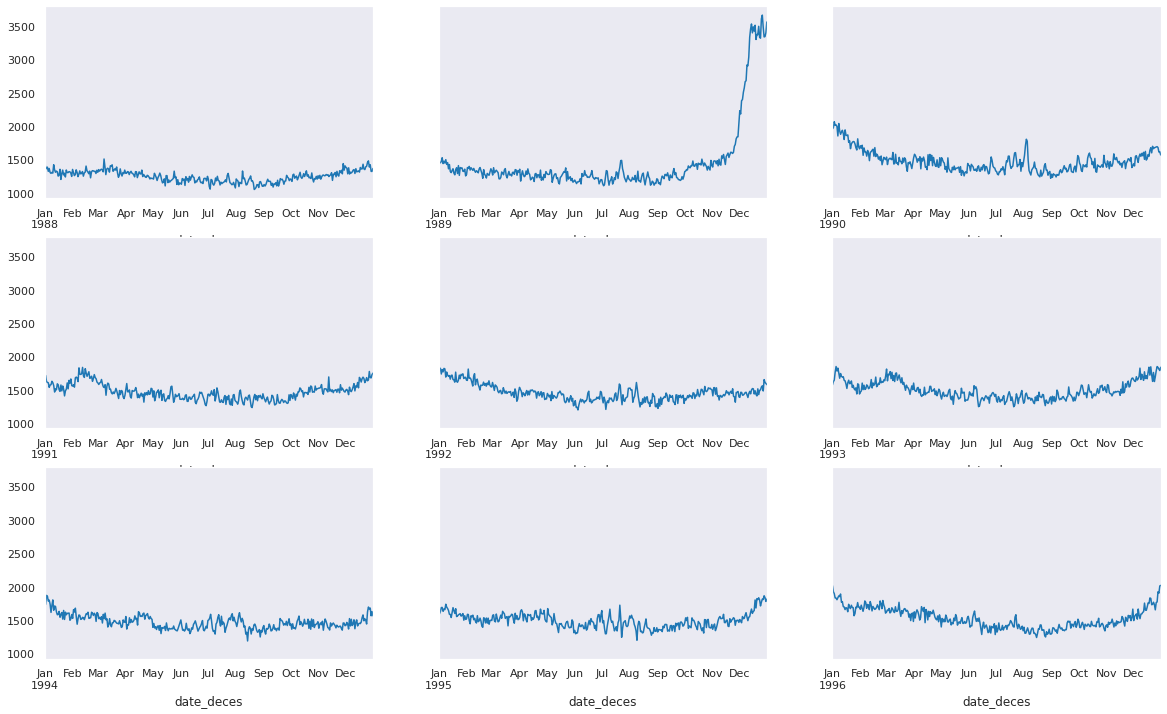

In [39]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, sharey=True, figsize=(20,12))

i = 0

for annee in [str(a) for a in range(1988,1997)] :
    deces[annee].plot(ax = axs[i//3][i%3])
    i = i+1


## Facetgrid : maps a dataset onto multiple axes

In [40]:
titanic = sns.load_dataset("titanic")
# titanic.head()

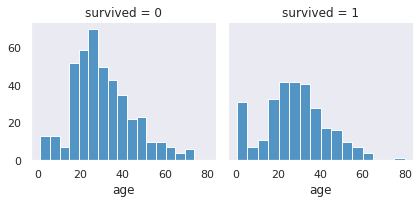

In [41]:
g = sns.FacetGrid(titanic, col="survived")
g.map(sns.histplot, "age")

# Distribution

## Jointplot = scatterplot + displot

In [42]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

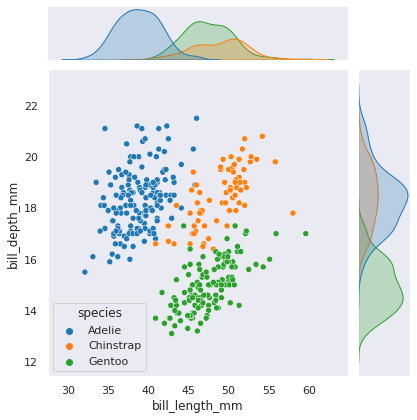

In [43]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

## Kdeplot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

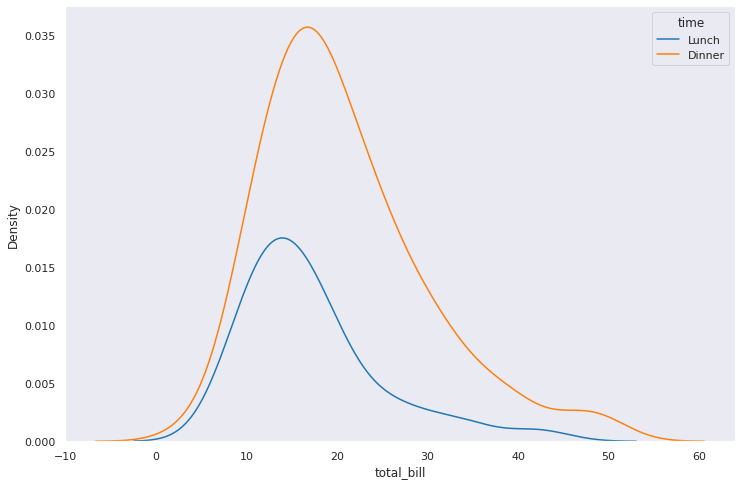

In [44]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill", hue="time")

<AxesSubplot:xlabel='age', ylabel='Density'>

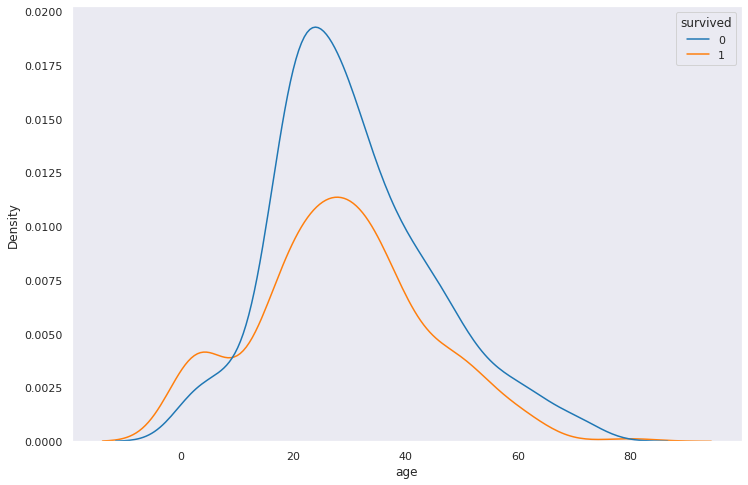

In [45]:
titanic = sns.load_dataset("titanic")
sns.kdeplot(data=titanic[titanic.age >= 0], x="age", hue="survived")

<AxesSubplot:xlabel='fare', ylabel='Density'>

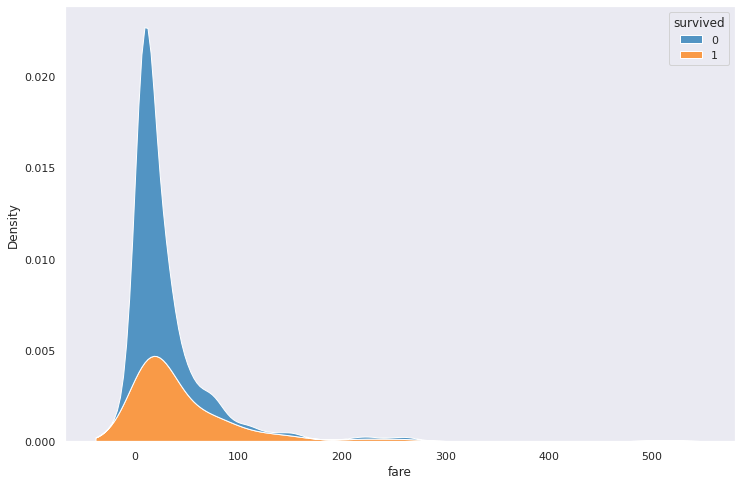

In [46]:
sns.kdeplot(data=titanic, x = "fare", hue = "survived", multiple="stack")

In [47]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.sample(5).to_csv('toto.csv')

## Distribution pour une variable continue : distplot

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

/home/lab/anaconda3/envs/ml-learning/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

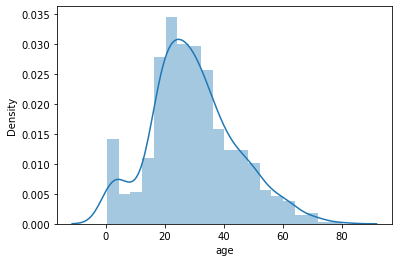

In [11]:
sns.distplot(a = titanic.age, kde = True)

# Tendance

## lineplot

In [51]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

<AxesSubplot:xlabel='year', ylabel='passengers'>

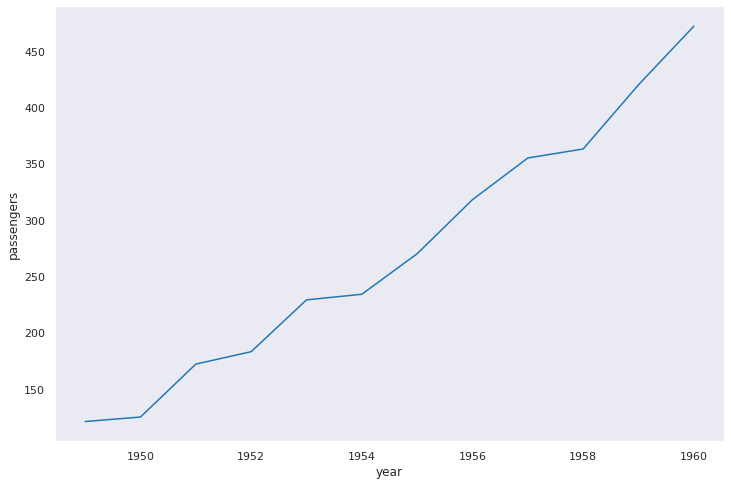

In [52]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

# Relation

## Pairplot

In [53]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

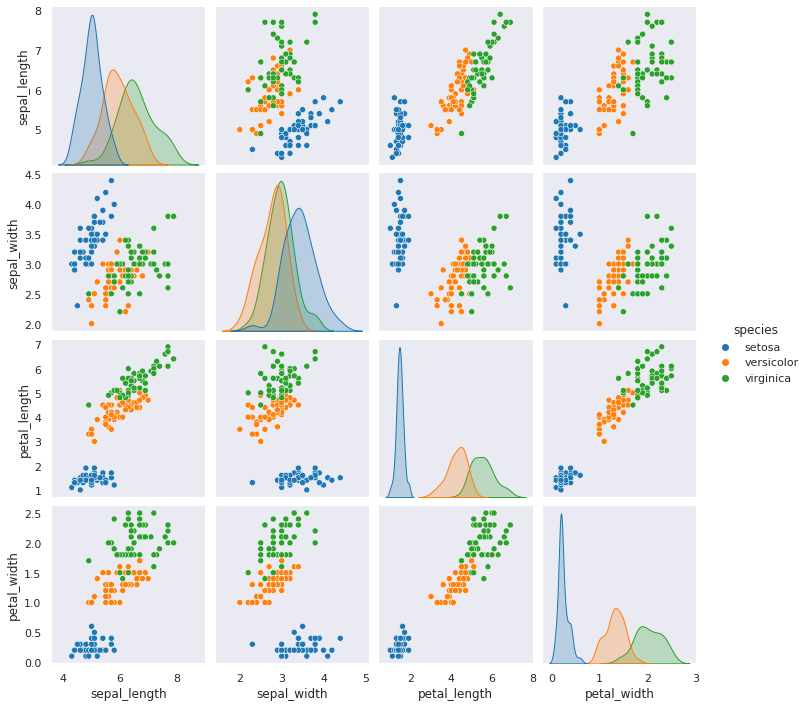

In [54]:
sns.pairplot(iris, hue="species");

## Scatterplot

In [55]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

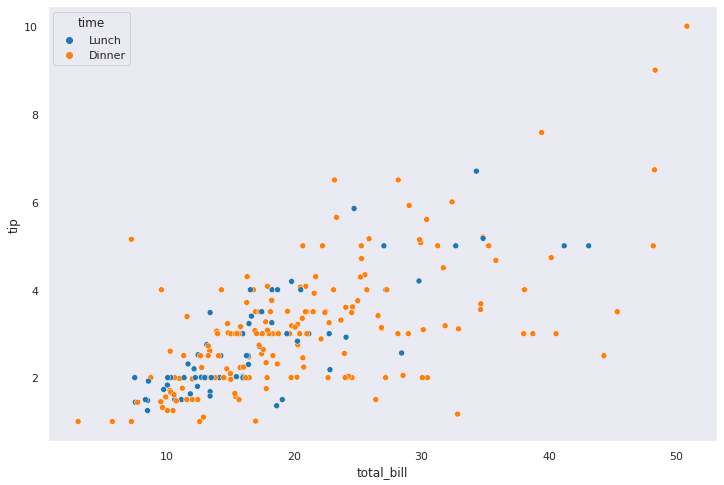

In [56]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

## Relplot : Scatterplot with varying point sizes and hues

https://seaborn.pydata.org/generated/seaborn.relplot.html

Figure-level interface for drawing relational plots onto a FacetGrid.

In [57]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

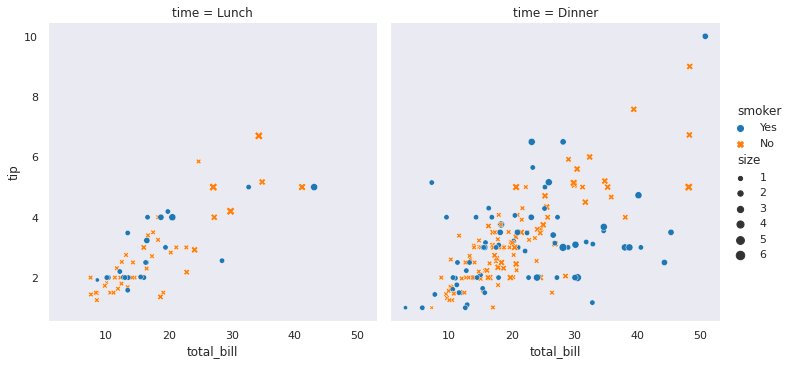

In [58]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

## lmplot : data and regression model fits across a FacetGrid

In [59]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

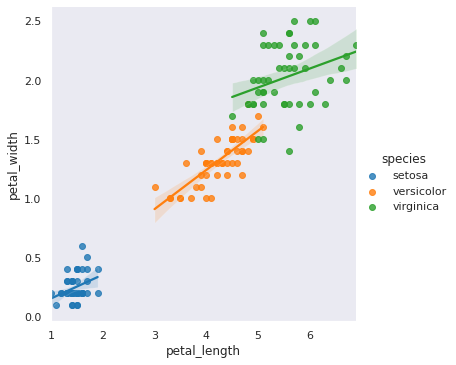

In [60]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue='species')

## Catplot
On peut faire bcp de choses avec catplot!

In [61]:
titanic = sns.load_dataset("titanic")
# titanic.head()

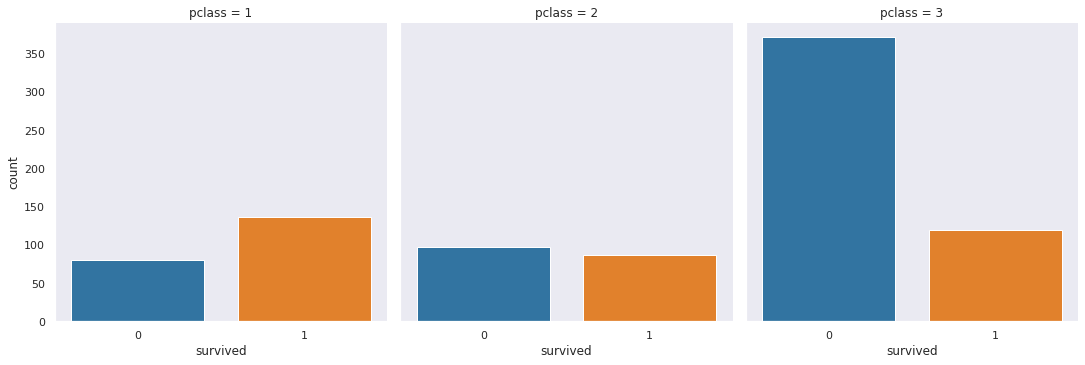

In [62]:
sns.catplot(x = "survived", kind = "count", col = "pclass", data =titanic)